!pip install setuptools==65.5.0
!pip install wheel==0.38.0
!pip install gym==0.21.0
!pip install gym-retro==0.8.0

In [12]:
!pip install gym gym-retro
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install matplotlib

Code for locating retro

In [ ]:
import os
import retro

retro_directory = os.path.dirname(retro.__file__)
game_dir = "data/stable/StreetFighterIISpecialChampionEdition-Genesis"
print(os.path.join(retro_directory, game_dir))

# Setup basic enviroment

In [ ]:
env.close()

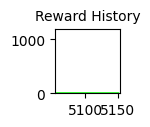

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from utils.balanced_env import BalancedStreetFighterEnv

# Inicializar el entorno
env = BalancedStreetFighterEnv()

# Parámetros del video
frame_height, frame_width = 84, 84  # Ajustar según el tamaño de tu observación
video_width = frame_width * 2  # Ancho del video
header_height = 40  # Altura del encabezado
fps = 30
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_file = 'gameplay_with_rewards.avi'
out = cv2.VideoWriter(video_file, fourcc, fps, (video_width, frame_height + header_height), isColor=True)

# Inicializar matplotlib para el gráfico de recompensas
fig, ax = plt.subplots(figsize=(frame_width / 100, frame_height / 100), dpi=100)
canvas = FigureCanvas(fig)
plt.axis('off')

# Configuración inicial del gráfico
reward_history = []

# Ejecutar el juego y capturar el video
obs = env.reset()
done = False
while not done:
    obs, reward, done, info = env.step(env.action_space.sample())
    
    # Guardar la recompensa
    reward_history.append(reward)
    
    # Convertir el frame del juego a RGB
    frame = cv2.cvtColor(obs, cv2.COLOR_GRAY2RGB)  # Si tus frames son en escala de grises
    
    # Crear gráfico de recompensas
    ax.clear()
    ax.plot(reward_history, color='lime')
    ax.set_ylim([0, max(1, max(reward_history))])  # Ajustar el rango del gráfico
    ax.set_xlim([max(0, len(reward_history) - 100), len(reward_history)])  # Mostrar últimos 100 valores
    ax.set_title('Reward History', fontsize=10)
    
    # Convertir el gráfico de matplotlib a imagen
    canvas.draw()
    reward_image = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8).reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    # Redimensionar la imagen del gráfico
    reward_image = cv2.resize(reward_image, (frame_width, frame_height))
    
    # Crear marco para el video
    frame_with_border = np.zeros((frame_height + header_height, video_width, 3), dtype=np.uint8)
    
    # Colocar el gráfico en el lado izquierdo
    frame_with_border[:frame_height, :frame_width] = reward_image
    
    # Colocar el video del juego en el lado derecho
    frame_with_border[:frame_height, frame_width:] = frame
    
    # Configurar el encabezado
    header = np.zeros((header_height, video_width, 3), dtype=np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = f'Reward: {reward:.2f}'  # Mostrar el número con dos decimales
    font_scale = 1  # Tamaño del texto
    font_thickness = 2  # Grosor del texto
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    
    # Posicionar el texto en el encabezado
    text_x = (video_width - text_size[0]) // 2
    text_y = (header_height + text_size[1]) // 2
    
    # Dibujar el texto en verde brillante sobre el encabezado
    cv2.putText(header, text, (text_x, text_y), font, font_scale, (0, 255, 0), font_thickness, cv2.LINE_AA)
    
    # Colocar el encabezado sobre el marco
    frame_with_border[:header_height, :] = header
    
    # Escribir el fotograma en el archivo de video
    out.write(frame_with_border)
    
# Cerrar el VideoWriter
out.release()

# Cerrar el entorno
env.close()



In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from utils.balanced_env import BalancedStreetFighterEnv

# Reset game to starting state
env = BalancedStreetFighterEnv()

rewards = []

plt.ion()  # Turn on interactive mode
fig, ax = plt.subplots()
line, = ax.plot(rewards)
ax.set_xlim(0, 100)
ax.set_ylim(-5, 5)
plt.xlabel('Frame')
plt.ylabel('Reward')
plt.title('Reward per Frame')

for game in range(10):
    obs = env.reset()
    done = False
    frame = 0
    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        rewards.append(reward)
        env.render()

        # Update plot
        line.set_xdata(np.arange(len(rewards)))
        line.set_ydata(rewards)
        ax.set_xlim(0, len(rewards))
        ax.set_ylim(min(rewards) - 1, max(rewards) + 1)
        fig.canvas.draw()
        fig.canvas.flush_events()

        print(f'Frame: {frame}, Reward: {reward}')
        frame += 1

    print("------------------------------------------ game: ", game)

# Close the environment
env.close()
plt.ioff()  # Turn off interactive mode
plt.show()



time_since_last_hit:  0.0


c:\Users\nicol\anaconda3\envs\stf2-enviroment\lib\site-packages\pyglet\libs\win32\__init__.py:318: UserWarning: Could not set COM MTA mode. Unexpected behavior may occur.
  warnings.warn("Could not set COM MTA mode. Unexpected behavior may occur.")


Frame: 0, Reward: -0.1
time_since_last_hit:  0.0
Frame: 1, Reward: -0.1
time_since_last_hit:  0.0
Frame: 2, Reward: -0.1
time_since_last_hit:  0.0
Frame: 3, Reward: -0.1
time_since_last_hit:  0.0
Frame: 4, Reward: -0.1
time_since_last_hit:  0.0
Frame: 5, Reward: -0.1
time_since_last_hit:  0.0
Frame: 6, Reward: -0.1
time_since_last_hit:  0.0
Frame: 7, Reward: -0.1
time_since_last_hit:  0.0
Frame: 8, Reward: -0.1
time_since_last_hit:  0.0
Frame: 9, Reward: -0.1
time_since_last_hit:  0.0
Frame: 10, Reward: -0.1
time_since_last_hit:  0.0
Frame: 11, Reward: -0.1
time_since_last_hit:  0.0
Frame: 12, Reward: -0.1
time_since_last_hit:  0.0
Frame: 13, Reward: -0.1
time_since_last_hit:  0.0
Frame: 14, Reward: -0.1
time_since_last_hit:  0.0
Frame: 15, Reward: -0.1
time_since_last_hit:  0.0
Frame: 16, Reward: -0.1
time_since_last_hit:  0.0
Frame: 17, Reward: -0.1
time_since_last_hit:  0.0
Frame: 18, Reward: -0.1
time_since_last_hit:  0.0
Frame: 19, Reward: -0.1
time_since_last_hit:  0.0
Frame: 20,

Sample game

Previous  176  Current  176
-0.1005
Previous  176  Current  176
-0.101
Previous  176  Current  176
-0.1015
Previous  176  Current  176
-0.10200000000000001
Previous  176  Current  176
-0.10250000000000001
Previous  176  Current  176
-0.10300000000000001
Previous  176  Current  176
-0.10350000000000001
Previous  176  Current  176
-0.10400000000000001
Previous  176  Current  176
-0.10450000000000001
Previous  176  Current  176
-0.10500000000000001
Previous  176  Current  176
-0.10550000000000001
Previous  176  Current  176
-0.10600000000000001
Previous  176  Current  176
-0.10650000000000001
Previous  176  Current  176
-0.10700000000000001
Previous  176  Current  176
-0.10750000000000001
Previous  176  Current  176
-0.10800000000000001
Previous  176  Current  176
-0.10850000000000001
Previous  176  Current  176
-0.10900000000000001
Previous  176  Current  176
-0.1095
Previous  176  Current  176
-0.11
Previous  176  Current  176
-0.1105
Previous  176  Current  176
-0.111
Previous  176  Cu

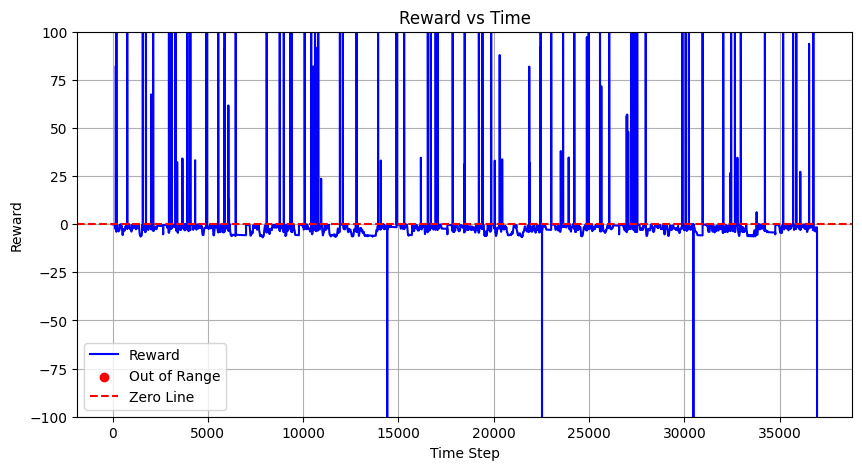

Mean Reward: -1.998706687317082
Standard Deviation of Reward: 8.569440381609319


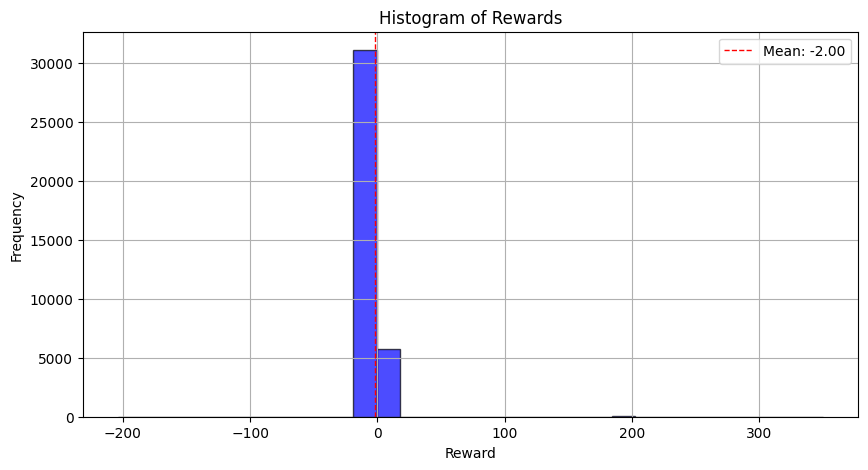

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from utils.balanced_env import BalancedStreetFighterEnv

# Reset game to starting state
env = BalancedStreetFighterEnv()

rewards = []

for game in range(5):
    obs = env.reset()
    done = False
    while not done:
        obs, reward, done, info = env.step(env.action_space.sample())
        rewards.append(reward)
        print(reward)
    print("------------------------------------------ game: ", game)

# Close the environment
env.close()

# Convert rewards to a numpy array for easier analysis
rewards = np.array(rewards)

# Identify points outside the range [-100, 100]
out_of_range_indices = np.where((rewards > 100) | (rewards < -100))[0]
out_of_range_rewards = rewards[out_of_range_indices]

# Plot rewards vs time
plt.figure(figsize=(10, 5))
plt.plot(rewards, label='Reward', color='blue')
plt.scatter(out_of_range_indices, out_of_range_rewards, color='red', label='Out of Range')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.ylim(-100, 100)
plt.title('Reward vs Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print statistics
mean_reward = np.mean(rewards)
std_reward = np.std(rewards)
print(f'Mean Reward: {mean_reward}')
print(f'Standard Deviation of Reward: {std_reward}')

# Plot histogram of rewards with out of range points
plt.figure(figsize=(10, 5))
plt.hist(rewards, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_reward, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_reward:.2f}')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards')
# Remove the x-axis limit to accommodate all data
plt.legend()
plt.grid(True)
plt.show()




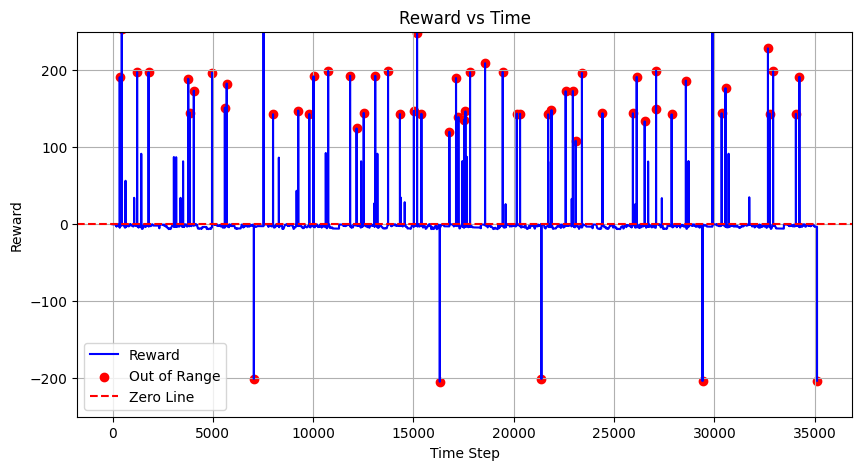

Mean Reward: -2.105047843997674
Standard Deviation of Reward: 8.578008334088638


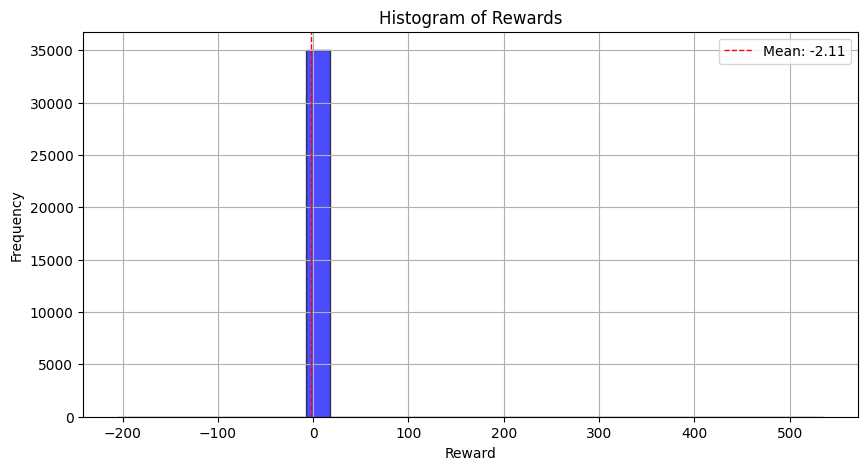

In [2]:
# Plot rewards vs time
plt.figure(figsize=(10, 5))
plt.plot(rewards, label='Reward', color='blue')
plt.scatter(out_of_range_indices, out_of_range_rewards, color='red', label='Out of Range')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.ylim(-250, 250)
plt.title('Reward vs Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print statistics
mean_reward = np.mean(rewards)
std_reward = np.std(rewards)
print(f'Mean Reward: {mean_reward}')
print(f'Standard Deviation of Reward: {std_reward}')

# Plot histogram of rewards with out of range points
plt.figure(figsize=(10, 5))
plt.hist(rewards, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_reward, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_reward:.2f}')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards')
# Remove the x-axis limit to accommodate all data
plt.legend()
plt.grid(True)
plt.show()

## Optuna


In [ ]:
import optuna 
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
from stable_baselines3.common.callbacks import CheckpointCallback
import os 

In [ ]:
LOG_DIR = './logs/'
OPT_DIR = './opt/'
os.makedirs(LOG_DIR, exist_ok=True)
os.makedirs(OPT_DIR, exist_ok=True)

In [ ]:
def optimize_ppo(trial): 
    return {
        'n_steps':trial.suggest_int('n_steps', 2048, 8192),
        'gamma':trial.suggest_loguniform('gamma', 0.8, 0.9999),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-4),
        'clip_range':trial.suggest_uniform('clip_range', 0.1, 0.4),
        'gae_lambda':trial.suggest_uniform('gae_lambda', 0.8, 0.99)
    }

In [ ]:
SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(1))

In [ ]:
def optimize_agent(trial):
    try:
        model_params = optimize_ppo(trial) 

        # Create environment 
        env = StreetFighterEnv(style="balanced")
        env = Monitor(env, LOG_DIR)
        env = DummyVecEnv([lambda: env])
        env = VecFrameStack(env, 4, channels_order='last')

        # Create algo 
        model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=0, **model_params)
        #model.learn(total_timesteps=300)
        model.learn(total_timesteps=100000)

        # Evaluate model 
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5)
        env.close()

        SAVE_PATH = os.path.join(OPT_DIR, 'trial_{}_best_model'.format(trial.number))
        model.save(SAVE_PATH)

        return mean_reward

    except Exception as e:
        print(e)
        return -1000

## Crear estudio


In [ ]:
study_name = 'ppo_street_fighter'  # Nombre del estudio
storage_name = f'sqlite:///{OPT_DIR}/{study_name}.db'
study = optuna.create_study(study_name=study_name, storage=storage_name, load_if_exists=True, direction='maximize')
study.optimize(optimize_agent, n_trials=100, n_jobs=1)

## Cargar estudio

In [ ]:
study_name = 'ppo_street_fighter'  # Nombre del estudio
storage_name = f'sqlite:///{OPT_DIR}/{study_name}.db'
study = optuna.load_study(study_name=study_name, storage=storage_name)


In [ ]:
# Obtener el mejor estudio
study.best_trial

In [ ]:
# Cargar el mejor estudio
model = PPO.load(os.path.join(OPT_DIR, 'trial_41_best_model.zip'))

# Guardar el mejor modelo

In [ ]:
from stable_baselines3.common.callbacks import BaseCallback

In [ ]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [ ]:
CHECKPOINT_DIR = './train/'
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

In [ ]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# Entrenar modelo

In [ ]:
# Create environment 

env = StreetFighterEnv(style="balanced")
env = Monitor(env, LOG_DIR)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')


In [ ]:
model_params = study.best_params
model_params['n_steps'] = 7488  # set n_steps to 7488 or a factor of 64
# model_params['learning_rate'] = 5e-7
model_params

In [ ]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, **model_params)

In [ ]:
model.load(os.path.join(CHECKPOINT_DIR, 'best_model_5000000.zip'))

In [ ]:
#model.learn(total_timesteps=1000, callback=callback)
model.learn(total_timesteps=5000000, callback=callback)

In [ ]:
model.save(os.path.join(log_dir, 'final_model'))

## Evaluar Modelo

In [ ]:
model_path = './logs/PPO_2'

# Cambiar los permisos del archivo
os.chmod(model_path, 0o777)

In [ ]:
model = PPO.load('./opt/trial_41_best_model.zip')

In [ ]:
mean_reward, _ = evaluate_policy(model, env, render=True, n_eval_episodes=1)


In [ ]:
mean_reward

# Testear modelo

In [ ]:
obs = env.reset()
obs.shape
env.step(model.predict(obs)[0])

In [ ]:
env.close()

In [ ]:
import time
import matplotlib.pyplot as plt
import cv2
total_rewards = []
victories = 0
defeats = 0
remaining_life_per_game = []
fourcc = cv2.VideoWriter_fourcc(*'XVID')
vw = cv2.VideoWriter('test2.avi', fourcc, 4, (320,224))
# Jugar 100 partidas
num_games = 3

for game in range(num_games):
    obs = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        action = model.predict(obs)[0]
        env.render()
        obs, reward, done, info = env.step(action)
        #time.sleep(0.00001)
        vw.write(obs)
        total_reward += reward
    vw.release()
        
    total_rewards.append(total_reward)
    
    # Encontrar la información relevante en info (asumiendo que info es una lista de diccionarios)
    relevant_info = None
    for item in info:
        if 'health' in item:
            remaining_life_per_game.append(item['health'])
        if 'matches_won' in item and 'enemy_matches_won' in item:
            if item['matches_won'] > item['enemy_matches_won']:
                victories += 1
            else:
                defeats += 1
            break  # Salir del bucle una vez que se han contado las victorias y derrotas


In [ ]:
pip install imageio


In [ ]:
import time
import matplotlib.pyplot as plt

# Inicializar métricas
total_rewards = []
victories = 0
defeats = 0
remaining_life_per_game = []

# Jugar 100 partidas
num_games = 3
for game in range(num_games):
    # Resetear el entorno
    obs = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        # Predecir acción usando el modelo
        action = model.predict(obs)[0]
        # Tomar acción en el entorno
        env.render()
        time.sleep(0.001)
        obs, reward, done, info = env.step(action)
        # Acumular recompensa
        total_reward += reward
        
    # Guardar las métricas del juego
    total_rewards.append(total_reward)
    
    # Encontrar la información relevante en info (asumiendo que info es una lista de diccionarios)
    relevant_info = None
    for item in info:
        if 'health' in item:
            remaining_life_per_game.append(item['health'])
        if 'matches_won' in item and 'enemy_matches_won' in item:
            if item['matches_won'] > item['enemy_matches_won']:
                victories += 1
            else:
                defeats += 1
            break  # Salir del bucle una vez que se han contado las victorias y derrotas
    print(victories)

# Resultados finales
print("Total Rewards per Game:", total_rewards)
print("Total Victories:", victories)
print("Total Defeats:", defeats)
print("Remaining Life per Game:", remaining_life_per_game)

# Graficar los resultados
plt.figure(figsize=(15, 5))

# Gráfico de Recompensa Total por Juego
plt.subplot(1, 3, 1)
plt.plot(total_rewards, marker='o')
plt.title('Total Rewards per Game')
plt.xlabel('Game')
plt.ylabel('Total Reward')

# Gráfico de Vida Restante por Juego
plt.subplot(1, 3, 2)
plt.plot(remaining_life_per_game, marker='o', color='orange')
plt.title('Remaining Life per Game')
plt.xlabel('Game')
plt.ylabel('Remaining Life')

# Gráfico de Victorias y Derrotas
plt.subplot(1, 3, 3)
plt.bar(['Victories', 'Defeats'], [victories, defeats], color=['green', 'red'])
plt.title('Victories vs Defeats')
plt.ylabel('Count')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [ ]:
backup_rewards = total_rewards 
backup_victories = victories
backup_defeats = defeats
backup_remaining_life_per_game = remaining_life_per_game

In [ ]:

# Resultados finales
print("Total Rewards per Game:", total_rewards)
print("Total Victories:", victories)
print("Total Defeats:", defeats)
print("Remaining Life per Game:", remaining_life_per_game)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(total_rewards, marker='o')
plt.title('Total Rewards per Game')
plt.xlabel('Game')
plt.ylabel('Total Reward')
plt.savefig('total_rewards_per_game.png')

# Save the second plot as a PNG file
plt.subplot(1, 3, 2)
plt.plot(remaining_life_per_game, marker='o', color='orange')
plt.title('Remaining Life per Game')
plt.xlabel('Game')
plt.ylabel('Remaining Life')
plt.savefig('remaining_life_per_game.png')

# Save the third plot as a PNG file
plt.subplot(1, 3, 3)
plt.bar(['Victories', 'Defeats'], [victories, defeats], color=['green', 'red'])
plt.title('Victories vs Defeats')
plt.ylabel('Count')
plt.savefig('victories_vs_defeats.png')

# Close the figure to free up memory
